#Introdução à Inteligência Artificial:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression #Regressão Linear
from sklearn.linear_model import LogisticRegression #Regressão Logística
from sklearn import svm #Máquina de Vetor de Suporte
import statsmodels.api as sm
from sklearn.metrics import classification_report
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import graphviz 

In [ ]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris['class'] = iris.target

In [ ]:
df_iris['nome'] = np.select([df_iris['class'] == 0,
                             df_iris['class'] == 1,
                             df_iris['class'] == 2],
                            ['setosa', 'versicolor', 'virginica'])

In [ ]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,nome
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
x, y = df_iris.drop(columns = ['class', 'nome']), df_iris['class']

In [ ]:
x.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
42,4.4,3.2,1.3,0.2
146,6.3,2.5,5.0,1.9
35,5.0,3.2,1.2,0.2
48,5.3,3.7,1.5,0.2
139,6.9,3.1,5.4,2.1


In [ ]:
y.sample(5)

30     0
7      0
122    2
26     0
42     0
Name: class, dtype: int64

##Divisão, Treino e Teste:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0 )

###Árvore de Decisão:

In [ ]:
arvoredecisao = tree.DecisionTreeClassifier(random_state = 42,
                                            max_depth = 2,
                                            criterion = 'entropy')
arvoredecisao = arvoredecisao.fit(x_train, y_train)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]')]

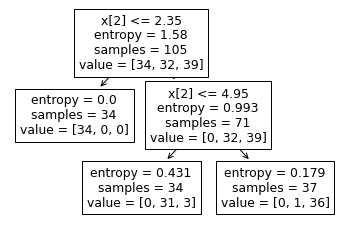

In [ ]:
tree.plot_tree(arvoredecisao)

In [ ]:
dot_data  = tree.export_graphviz(arvoredecisao, out_file = None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

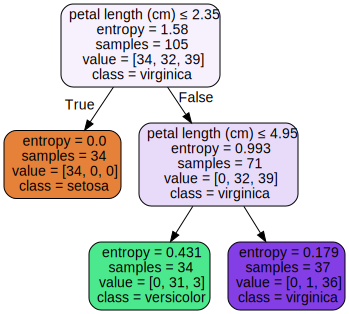

In [ ]:
dot_data = tree.export_graphviz(arvoredecisao, out_file = None,
                                         feature_names = iris.feature_names,
                                         class_names = iris.target_names,
                                         filled = True, rounded = True,
                                         special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_teste_arvore = arvoredecisao.predict(x_test)
y_treino_arvore = arvoredecisao.predict(x_train)

In [ ]:
target_names = df_iris['nome'].unique()
print(classification_report(y_treino_arvore, y_train, target_names = target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.97      0.91      0.94        34
   virginica       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [ ]:
print(classification_report(y_teste_arvore, y_test, target_names = target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.85      0.89        20
   virginica       0.73      0.89      0.80         9

    accuracy                           0.91        45
   macro avg       0.89      0.91      0.90        45
weighted avg       0.92      0.91      0.91        45



##Naïve Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predicao_treino_nb = gnb.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy:', accuracy_score(y_train, predicao_treino_nb))
cm_train =confusion_matrix(y_train, predicao_treino_nb)
cm_train

Accuracy: 0.9428571428571428


array([[34,  0,  0],
       [ 0, 29,  3],
       [ 0,  3, 36]])

In [ ]:
predicao_teste_nb = gnb.predict(x_test)

In [ ]:
cm_test = confusion_matrix(y_test, predicao_teste_nb)

In [ ]:
print('Accuracy:', accuracy_score(y_test, predicao_teste_nb))
cm_test

Accuracy: 1.0


array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

##Rrgressão Linear:

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_train_lr = lr.predict(x_train)
pred_test_lr = lr.predict(x_test)

In [ ]:
x_train_regr = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_regr).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     384.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           8.94e-60
Time:                        20:47:11   Log-Likelihood:                 17.093
No. Observations:                 105   AIC:                            -24.19
Df Residuals:                     100   BIC:                            -10.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3502      0.22

##Regressão logística:

In [ ]:
logit = LogisticRegression(random_state = 42 )